# Project: Credit Scanning

Issue type: binary classification
    
dataset: http://archive.ics.uci.edu/ml/datasets/credit+approval



In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


In [2]:
file_path = 'Pobrane/Credit-screening/crx.data'
df = pd.read_csv(file_path,header=None)

## Read data

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
print(str(df.shape[0]) + ' rows')
print(str(df.shape[1]) + ' columns')

690 rows
16 columns


In [6]:
df = pd.read_csv(file_path, header=None, decimal='.', na_values='?', 
                 dtype = {0:'category',3:'category',4:'category',
                          5:'category',6:'category',8:'category',
                          9:'category',11:'category',12:'category',15:'category'})

In [7]:
df.dtypes

0     category
1      float64
2      float64
3     category
4     category
5     category
6     category
7      float64
8     category
9     category
10       int64
11    category
12    category
13     float64
14       int64
15    category
dtype: object

In [8]:
summary = pd.DataFrame(df.dtypes, columns=['Dtype'])
summary['Nulls'] = pd.DataFrame(df.isnull().any())
summary['Sum_of_nulls'] = pd.DataFrame(df.isnull().sum())
summary['Per_of_nulls'] = round((df.apply(pd.isnull).mean()*100),2)
summary.Dtype = summary.Dtype.astype(str)
print(summary)

       Dtype  Nulls  Sum_of_nulls  Per_of_nulls
0   category   True            12          1.74
1    float64   True            12          1.74
2    float64  False             0          0.00
3   category   True             6          0.87
4   category   True             6          0.87
5   category   True             9          1.30
6   category   True             9          1.30
7    float64  False             0          0.00
8   category  False             0          0.00
9   category  False             0          0.00
10     int64  False             0          0.00
11  category  False             0          0.00
12  category  False             0          0.00
13   float64   True            13          1.88
14     int64  False             0          0.00
15  category  False             0          0.00


In [9]:
## what is the % of observations containing nulls
(df.isnull().any(axis=1).sum()/df.shape[0])*100

5.36231884057971

In [13]:
df = pd.read_csv(file_path, header=None, names=['Płeć','Wiek','Zadłużenie','Stan_cywilny','Bank','Wykształcenie',
                                                'Pochodzenie','Lata_pracy','Poz_hist_kred','Umowa_o_pracę',
                                                'Score_kredytowy','Prawo_jazdy','Obywatelstwo','Saldo_konta',
                                                'Przychody','Wynik'], decimal='.', na_values='?', 
                 dtype = {'Płeć':'category','Stan_cywilny':'category','Bank':'category','Wykształcenie':'category',
                          'Pochodzenie':'category','Poz_hist_kred':'category','Umowa_o_pracę':'category',
                          'Prawo_jazy':'category','Obywatelstwo':'category','Wynik':'category'})

In [14]:
df.dropna(inplace=True)

In [15]:
print(str(df.shape[0]) + " rows after removing nulls")

653 rows after removing nulls


In [18]:
df.dtypes

Płeć               category
Wiek                float64
Zadłużenie          float64
Stan_cywilny       category
Bank               category
Wykształcenie      category
Pochodzenie        category
Lata_pracy          float64
Poz_hist_kred      category
Umowa_o_pracę      category
Score_kredytowy       int64
Prawo_jazdy          object
Obywatelstwo       category
Saldo_konta         float64
Przychody             int64
Wynik              category
dtype: object

In [23]:
df.describe(include='all')

,Płeć,Wiek,Zadłużenie,Stan_cywilny,Bank,Wykształcenie,Pochodzenie,Lata_pracy,Poz_hist_kred,Umowa_o_pracę,Score_kredytowy,Prawo_jazdy,Obywatelstwo,Saldo_konta,Przychody,Wynik
count,653,653.000000,653.000000,653,653,653,653,653.000000,653,653,653.000000,653,653,653.000000,653.000000,653
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,450,NaN,NaN,499,499,133,381,NaN,349,366,NaN,351,598,NaN,NaN,357
mean,NaN,31.503813,4.829533,NaN,NaN,NaN,NaN,2.244296,NaN,NaN,2.502297,NaN,NaN,180.359877,1013.761103,NaN
std,NaN,11.838267,5.027077,NaN,NaN,NaN,NaN,3.371120,NaN,NaN,4.968497,NaN,NaN,168.296811,5253.278504,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.580000,1.040000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,73.000000,0.000000,NaN
50%,NaN,28.420000,2.835000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.250000,7.500000,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.000000,NaN,NaN,272.000000,400.000000,NaN


In [24]:
# change categorical variables to binary
df.Płeć.replace('a',1, inplace=True)
df.Płeć.replace('b',0, inplace=True)
df.Poz_hist_kred.replace('t',1, inplace=True)
df.Poz_hist_kred.replace('f',0, inplace=True)
df.Umowa_o_pracę.replace('t',1, inplace=True)
df.Umowa_o_pracę.replace('f',0, inplace=True)
df.Prawo_jazdy.replace('t',1, inplace=True)
df.Prawo_jazdy.replace('f',0, inplace=True)
df.Wynik.replace('+',1, inplace=True)
df.Wynik.replace('-',0, inplace=True)


df['Poz_hist_kred'] = df['Poz_hist_kred'].astype('uint8')
df['Umowa_o_pracę'] = df['Umowa_o_pracę'].astype('uint8')
df['Płeć'] = df['Płeć'].astype('uint8')
df['Prawo_jazdy'] = df['Prawo_jazdy'].astype('uint8')
df['Wynik'] = df['Wynik'].astype('uint8')

In [25]:
df.Płeć.unique()

array([0, 1])

## Data exploration

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


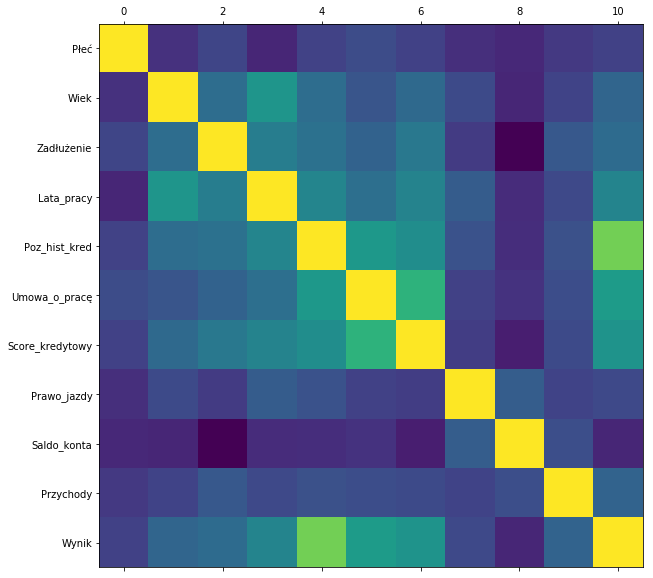

In [26]:
import matplotlib.pyplot as plt
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(df.corr())
plt.legend()

plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

In [27]:
df.corr()

,Płeć,Wiek,Zadłużenie,Lata_pracy,Poz_hist_kred,Umowa_o_pracę,Score_kredytowy,Prawo_jazdy,Saldo_konta,Przychody,Wynik
Płeć,1.000000,-0.042177,0.034906,-0.084899,0.023251,0.065192,0.016683,-0.052315,-0.077617,-0.013099,0.019817
Wiek,-0.042177,1.000000,0.217681,0.417647,0.218637,0.103633,0.198153,0.058133,-0.084618,0.029078,0.180252
Zadłużenie,0.034906,0.217681,1.000000,0.300600,0.236751,0.166092,0.269834,-0.006083,-0.217076,0.119754,0.207086
Lata_pracy,-0.084899,0.417647,0.300600,1.000000,0.336148,0.228035,0.327325,0.139317,-0.064781,0.052159,0.332728
Poz_hist_kred,0.023251,0.218637,0.236751,0.336148,1.000000,0.430586,0.378264,0.089864,-0.057225,0.084427,0.738829
Umowa_o_pracę,0.065192,0.103633,0.166092,0.228035,0.430586,1.000000,0.569176,0.020223,-0.038994,0.068189,0.451866
Score_kredytowy,0.016683,0.198153,0.269834,0.327325,0.378264,0.569176,1.000000,0.005757,-0.116101,0.058408,0.406052
Prawo_jazdy,-0.052315,0.058133,-0.006083,0.139317,0.089864,0.020223,0.005757,1.000000,0.139708,0.027534,0.050011
Saldo_konta,-0.077617,-0.084618,-0.217076,-0.064781,-0.057225,-0.038994,-0.116101,0.139708,1.000000,0.073384,-0.085217
Przychody,-0.013099,0.029078,0.119754,0.052159,0.084427,0.068189,0.058408,0.027534,0.073384,1.000000,0.172766


In [28]:
stats = df.select_dtypes(['float','int']).describe()
stats = stats.transpose()
stats = stats[['count','std','min','25%','50%','75%','max','mean']]
print(stats)

                 count          std    min     25%      50%      75%  \
Wiek             653.0    11.838267  13.75  22.580   28.420   38.250   
Zadłużenie       653.0     5.027077   0.00   1.040    2.835    7.500   
Lata_pracy       653.0     3.371120   0.00   0.165    1.000    2.625   
Score_kredytowy  653.0     4.968497   0.00   0.000    0.000    3.000   
Saldo_konta      653.0   168.296811   0.00  73.000  160.000  272.000   
Przychody        653.0  5253.278504   0.00   0.000    5.000  400.000   

                       max         mean  
Wiek                 76.75    31.503813  
Zadłużenie           28.00     4.829533  
Lata_pracy           28.50     2.244296  
Score_kredytowy      67.00     2.502297  
Saldo_konta        2000.00   180.359877  
Przychody        100000.00  1013.761103  


For DecisionTree model there is no need to normalize data or remove outliers. 

This will be done later, before implementation of logistic regression.

### analyze categorical variables

In [29]:
df.select_dtypes(['category']).describe()

,Stan_cywilny,Bank,Wykształcenie,Pochodzenie,Obywatelstwo
count,653,653,653,653,653
unique,3,3,14,9,3
top,u,g,c,v,g
freq,499,499,133,381,598


In [30]:
df.select_dtypes(['category', 'uint8']).columns

Index(['Płeć', 'Stan_cywilny', 'Bank', 'Wykształcenie', 'Pochodzenie',
       'Poz_hist_kred', 'Umowa_o_pracę', 'Prawo_jazdy', 'Obywatelstwo',
       'Wynik'],
      dtype='object')

check the relation between the variables and  the response

1. Płeć

In [31]:
cat = pd.DataFrame(df['Płeć'].value_counts())
cat.rename(columns={'Płeć':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)

   num_of_obs  Per_of_obs
0         450   68.912711
1         203   31.087289


In [32]:
pd.crosstab(df.Płeć,df.Wynik)

Wynik,0,1
Płeć,,
0,249,201
1,108,95


'2. Stan cywilny

In [33]:
cat = pd.DataFrame(df['Stan_cywilny'].value_counts())
cat.rename(columns={'Stan_cywilny':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print('--------------------')
print(pd.crosstab(df.Stan_cywilny,df.Wynik))

   num_of_obs  Per_of_obs
u         499   76.416539
y         152   23.277182
l           2    0.306279
--------------------
Wynik           0    1
Stan_cywilny          
l               0    2
u             250  249
y             107   45


'3. Bank

In [34]:
cat = pd.DataFrame(df['Bank'].value_counts())
cat.rename(columns={'Bank':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print('--------------------')
print(pd.crosstab(df.Bank,df.Wynik))

    num_of_obs  Per_of_obs
g          499   76.416539
p          152   23.277182
gg           2    0.306279
--------------------
Wynik    0    1
Bank           
g      250  249
gg       0    2
p      107   45


Bank and stan_cywilny are the same variables

In [35]:
df.groupby(['Bank','Stan_cywilny'])["Wynik"].describe().unstack()

,,count,mean,std,min,25%,50%,75%,max
Bank,Stan_cywilny,,,,,,,,
g,u,499.0,0.498998,0.500501,0.0,0.0,0.0,1.0,1.0
gg,l,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
p,y,152.0,0.296053,0.458024,0.0,0.0,0.0,1.0,1.0


'4. Wykształcenie

In [36]:
cat = pd.DataFrame(df['Wykształcenie'].value_counts())
cat.rename(columns={'Wykształcenie':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print('--------------------')
print(pd.crosstab(df.Wykształcenie,df.Wynik))

    num_of_obs  Per_of_obs
c          133   20.367534
q           75   11.485452
w           63    9.647779
i           55    8.422665
aa          52    7.963247
ff          50    7.656968
k           48    7.350689
cc          40    6.125574
m           38    5.819296
x           36    5.513017
d           26    3.981623
e           24    3.675345
j           10    1.531394
r            3    0.459418
--------------------
Wynik           0   1
Wykształcenie        
aa             33  19
c              73  60
cc             11  29
d              19   7
e              10  14
ff             43   7
i              41  14
j               7   3
k              35  13
m              22  16
q              26  49
r               1   2
w              30  33
x               6  30


'5. Historia kredytowa

In [37]:
cat = pd.DataFrame(df['Poz_hist_kred'].value_counts())
cat.rename(columns={'Poz_hist_kred':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print('--------------------')
print(pd.crosstab(df.Poz_hist_kred,df.Wynik))

   num_of_obs  Per_of_obs
1         349   53.445636
0         304   46.554364
--------------------
Wynik            0    1
Poz_hist_kred          
0              286   18
1               71  278


'6. Umowa o pracę

In [38]:
cat = pd.DataFrame(df['Umowa_o_pracę'].value_counts())
cat.rename(columns={'Umowa_o_pracę':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print('--------------------')
print(pd.crosstab(df.Umowa_o_pracę,df.Wynik))

   num_of_obs  Per_of_obs
0         366   56.049005
1         287   43.950995
--------------------
Wynik            0    1
Umowa_o_pracę          
0              273   93
1               84  203


'7. Prawo jazdy

In [40]:
cat = pd.DataFrame(df['Prawo_jazdy'].value_counts())
cat.rename(columns={'Prawo_jazdy':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print('--------------------')
print(pd.crosstab(df.Prawo_jazdy,df.Wynik))

   num_of_obs  Per_of_obs
0         351   53.751914
1         302   46.248086
--------------------
Wynik          0    1
Prawo_jazdy          
0            200  151
1            157  145


## Prepare data for modelling

In [41]:
# first change categorical variables to dummies
df.select_dtypes(include=['category']).describe()

,Stan_cywilny,Bank,Wykształcenie,Pochodzenie,Obywatelstwo
count,653,653,653,653,653
unique,3,3,14,9,3
top,u,g,c,v,g
freq,499,499,133,381,598


In [42]:
df = pd.concat([df,pd.get_dummies(df.Stan_cywilny,prefix="Stan_cywilny__")],axis=1)
df = pd.concat([df,pd.get_dummies(df.Bank,prefix="Bank__")],axis=1)
df = pd.concat([df,pd.get_dummies(df.Wykształcenie,prefix="Wykształcenie__")],axis=1)
df = pd.concat([df,pd.get_dummies(df.Pochodzenie,prefix="Pochodzenie__")],axis=1)
df = pd.concat([df,pd.get_dummies(df.Obywatelstwo,prefix="Obywatelstwo__")],axis=1)

In [43]:
df.drop(["Stan_cywilny","Bank","Wykształcenie","Pochodzenie","Obywatelstwo"],axis=1, inplace=True)

In [44]:
df.shape

(653, 43)

In [45]:
# split to train and test
y = df.Wynik
df.drop(["Wynik"],axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.2, stratify=y, random_state=5072018)

In [46]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.545977
1    0.454023
Name: Wynik, dtype: float64
0    0.549618
1    0.450382
Name: Wynik, dtype: float64


## Model 1. - benchmark

In [47]:
model = DecisionTreeClassifier()
cv = cross_val_score(model, x_train, y_train, cv = 10, scoring='accuracy')

In [48]:
print('Average Accuracy: ' + str(cv.mean().round(3)))
print('Stability: ' + str((cv.std()*100/cv.mean()).round(3)) + '%')

Average Accuracy: 0.816
Stability: 5.498%


In [49]:
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('Benchmark: ' + str(round(accuracy_score(pred, y_test),3)))

Benchmark: 0.87


## Model 2 - optimize parameters

In [50]:
params = {'criterion':('entropy','gini'),
         'splitter':('best','random'),
         'max_depth':(2,3,4,5,6,7,8,9,10),
         'min_samples_split':(2,3,4,5,6,7,8,9,10),
         'min_samples_leaf':(3,4,5)}

gs = GridSearchCV(model, params,cv=10)


In [51]:
gs.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ('entropy', 'gini'), 'splitter': ('best', 'random'), 'max_depth': (2, 3, 4, 5, 6, 7, 8, 9, 10), 'min_samples_split': (2, 3, 4, 5, 6, 7, 8, 9, 10), 'min_samples_leaf': (3, 4, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [54]:
cv = cross_val_score(DecisionTreeClassifier(**gs.best_params_), x_train, y_train, cv = 10, scoring = 'accuracy')
print('Average Accuracy: ' + str(cv.mean().round(3)))
print('Stability: ' + str((cv.std()*100/cv.mean()).round(3)) + '%')

Average Accuracy: 0.872
Stability: 4.189%


## Model 3 - RFE

In [55]:
model = DecisionTreeClassifier(**gs.best_params_)
acc_all = []
stab_all = []
for m in np.arange(0,20):
    stab_loop = []
    acc_loop = []
    for n in np.arange(5, 20, 1):
        selector = RFE(model, n, 1)
        cv = cross_val_score(model, x_train.iloc[:,selector.fit(x_train, y_train).support_], y_train, cv = 10, scoring = 'accuracy')
        acc_loop.append(cv.mean())
        stab_loop.append(cv.std()*100/cv.mean())
        acc_all.append(acc_loop)
        stab_all.append(stab_loop)
acc = pd.DataFrame(acc_all, columns = np.arange(5, 20, 1))
stab = pd.DataFrame(stab_all, columns = np.arange(5, 20, 1))

In [56]:
acc.mean()

5     0.871673
6     0.871673
7     0.871673
8     0.871673
9     0.871673
10    0.871673
11    0.871673
12    0.871673
13    0.871673
14    0.871673
15    0.871673
16    0.871673
17    0.871673
18    0.871673
19    0.871673
dtype: float64

In [57]:
stab.mean()

5     4.189018
6     4.189018
7     4.189018
8     4.189018
9     4.189018
10    4.189018
11    4.189018
12    4.189018
13    4.189018
14    4.189018
15    4.189018
16    4.189018
17    4.189018
18    4.189018
19    4.189018
dtype: float64

In [58]:
selector = RFE(model,6, 1)
cols = x_train.iloc[:,selector.fit(x_train, y_train).support_].columns
print(cols)

Index(['Zadłużenie', 'Poz_hist_kred', 'Przychody', 'Obywatelstwo___g',
       'Obywatelstwo___p', 'Obywatelstwo___s'],
      dtype='object')


## Model 5 - Logistic Regression

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [60]:
df = pd.read_csv(file_path, header=None, names=['Płeć','Wiek','Zadłużenie','Stan_cywilny','Bank','Wykształcenie',
                                                'Pochodzenie','Lata_pracy','Poz_hist_kred','Umowa_o_pracę',
                                                'Score_kredytowy','Prawo_jazdy','Obywatelstwo','Saldo_konta',
                                                'Przychody','Wynik'], decimal='.', na_values='?', 
                 dtype = {'Płeć':'category','Stan_cywilny':'category','Bank':'category','Wykształcenie':'category',
                          'Pochodzenie':'category','Poz_hist_kred':'category','Umowa_o_pracę':'category',
                          'Prawo_jazy':'category','Obywatelstwo':'category','Wynik':'category'})

df.dropna(inplace=True)

df.Płeć.replace('a',1, inplace=True)
df.Płeć.replace('b',0, inplace=True)
df.Poz_hist_kred.replace('t',1, inplace=True)
df.Poz_hist_kred.replace('f',0, inplace=True)
df.Umowa_o_pracę.replace('t',1, inplace=True)
df.Umowa_o_pracę.replace('f',0, inplace=True)
df.Prawo_jazdy.replace('t',1, inplace=True)
df.Prawo_jazdy.replace('f',0, inplace=True)
df.Wynik.replace('+',1, inplace=True)
df.Wynik.replace('-',0, inplace=True)


df['Poz_hist_kred'] = df['Poz_hist_kred'].astype('uint8')
df['Umowa_o_pracę'] = df['Umowa_o_pracę'].astype('uint8')
df['Płeć'] = df['Płeć'].astype('uint8')
df['Prawo_jazdy'] = df['Prawo_jazdy'].astype('uint8')
df['Wynik'] = df['Wynik'].astype('uint8')

df = pd.concat([df,pd.get_dummies(df.Stan_cywilny,prefix="Stan_cywilny__")],axis=1)
df = pd.concat([df,pd.get_dummies(df.Bank,prefix="Bank__")],axis=1)
df = pd.concat([df,pd.get_dummies(df.Wykształcenie,prefix="Wykształcenie__")],axis=1)
df = pd.concat([df,pd.get_dummies(df.Pochodzenie,prefix="Pochodzenie__")],axis=1)
df = pd.concat([df,pd.get_dummies(df.Obywatelstwo,prefix="Obywatelstwo__")],axis=1)

In [61]:
df.drop(["Stan_cywilny","Bank","Wykształcenie","Pochodzenie","Obywatelstwo"],axis=1, inplace=True)

### remove outliers

In [62]:
numerics = df.select_dtypes(['float','int'])
numerics

,Wiek,Zadłużenie,Lata_pracy,Score_kredytowy,Saldo_konta,Przychody
0,30.83,0.000,1.250,1,202.0,0
1,58.67,4.460,3.040,6,43.0,560
2,24.50,0.500,1.500,0,280.0,824
3,27.83,1.540,3.750,5,100.0,3
4,20.17,5.625,1.710,0,120.0,0
5,32.08,4.000,2.500,0,360.0,0
6,33.17,1.040,6.500,0,164.0,31285
7,22.92,11.585,0.040,0,80.0,1349
8,54.42,0.500,3.960,0,180.0,314
9,42.50,4.915,3.165,0,52.0,1442


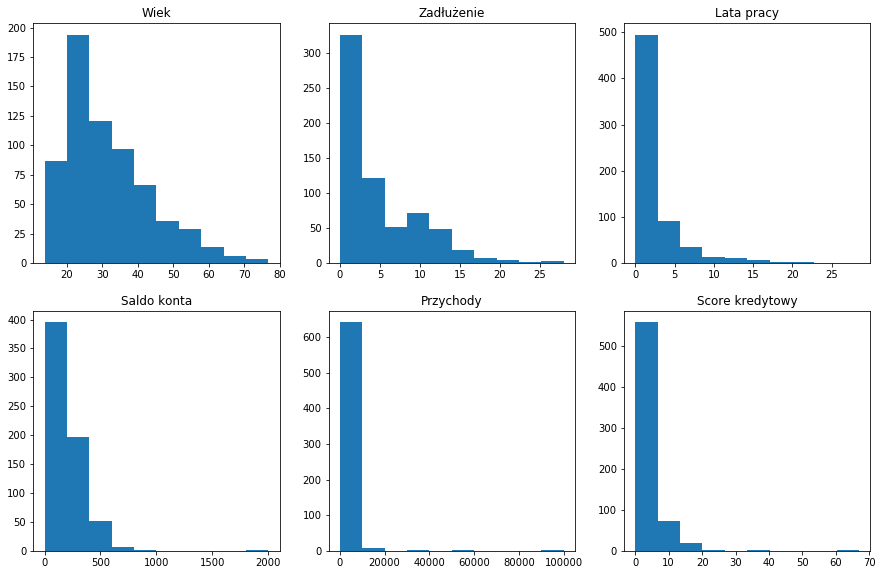

In [63]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.subplot(331)
plt.hist(df.Wiek)
plt.title("Wiek")

plt.subplot(332)
plt.hist(df.Zadłużenie)
plt.title("Zadłużenie")

#plt.show()

plt.subplot(333)
plt.hist(df.Lata_pracy)
plt.title("Lata pracy")
plt.subplot(334)
plt.hist(df.Saldo_konta)
plt.title("Saldo konta")

#plt.show()

plt.subplot(335)
plt.hist(df.Przychody)
plt.title("Przychody")


plt.subplot(336)
plt.hist(df.Score_kredytowy)
plt.title("Score kredytowy")

plt.show()

In [64]:
numerics.describe()

,Wiek,Zadłużenie,Lata_pracy,Score_kredytowy,Saldo_konta,Przychody
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [65]:
df_no_outliers = df[np.abs(df.Wiek-df.Wiek.mean()) <= (3*df.Wiek.std())]
df_no_outliers = df_no_outliers[np.abs(df_no_outliers.Zadłużenie-df_no_outliers.Zadłużenie.mean()) <= (3*df_no_outliers.Zadłużenie.std())]
df_no_outliers = df_no_outliers[np.abs(df_no_outliers.Lata_pracy-df_no_outliers.Lata_pracy.mean()) <= (3*df_no_outliers.Lata_pracy.std())]
df_no_outliers = df_no_outliers[np.abs(df_no_outliers.Score_kredytowy-df_no_outliers.Score_kredytowy.mean()) <= (3*df_no_outliers.Score_kredytowy.std())]
df_no_outliers = df_no_outliers[np.abs(df_no_outliers.Saldo_konta-df_no_outliers.Saldo_konta.mean()) <= (3*df_no_outliers.Saldo_konta.std())]
df_no_outliers = df_no_outliers[np.abs(df_no_outliers.Przychody-df_no_outliers.Przychody.mean()) <= (3*df_no_outliers.Przychody.std())]

print(df_no_outliers.shape)

(603, 43)


In [66]:
df_no_outliers.describe()

,Płeć,Wiek,Zadłużenie,Lata_pracy,Poz_hist_kred,Umowa_o_pracę,Score_kredytowy,Prawo_jazdy,Saldo_konta,Przychody,...,Pochodzenie___ff,Pochodzenie___h,Pochodzenie___j,Pochodzenie___n,Pochodzenie___o,Pochodzenie___v,Pochodzenie___z,Obywatelstwo___g,Obywatelstwo___p,Obywatelstwo___s
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,...,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,0.318408,30.343085,4.340091,1.778101,0.510779,0.414594,2.089552,0.454395,173.646766,557.233831,...,0.077944,0.202322,0.013267,0.006633,0.001658,0.608624,0.001658,0.915423,0.001658,0.082919
std,0.466245,10.686169,4.313223,2.216512,0.500299,0.493061,3.595208,0.498329,136.935612,1478.135739,...,0.268305,0.402064,0.114511,0.081243,0.040723,0.488464,0.040723,0.278482,0.040723,0.275988
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.375000,1.000000,0.165000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,27.670000,2.500000,1.000000,1.000000,0.000000,0.000000,0.000000,160.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,36.375000,6.500000,2.500000,1.000000,1.000000,3.000000,1.000000,260.000000,348.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,65.170000,19.500000,11.000000,1.000000,1.000000,16.000000,1.000000,640.000000,11202.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


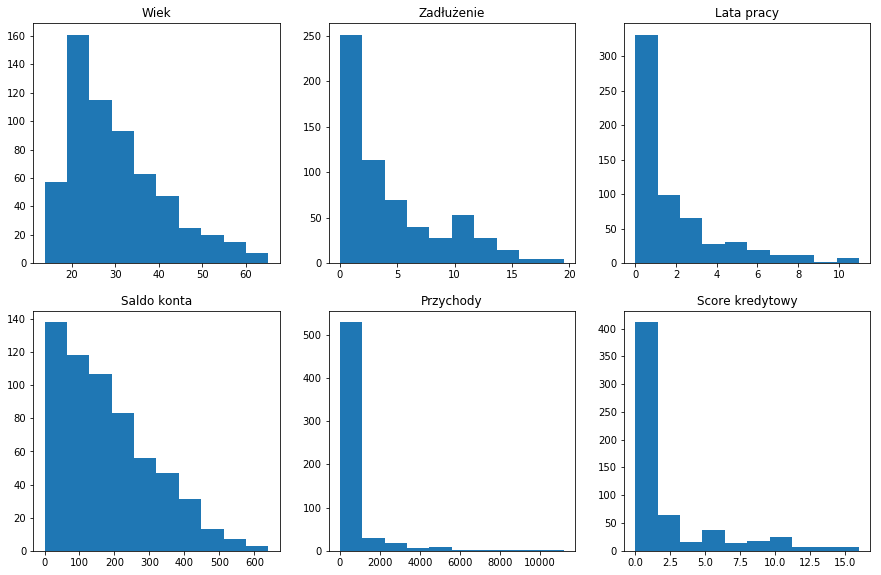

In [67]:
fig, ax = plt.subplots(figsize=(15, 15))

plt.subplot(331)
plt.hist(df_no_outliers.Wiek)
plt.title("Wiek")

plt.subplot(332)
plt.hist(df_no_outliers.Zadłużenie)
plt.title("Zadłużenie")

#plt.show()

plt.subplot(333)
plt.hist(df_no_outliers.Lata_pracy)
plt.title("Lata pracy")
plt.subplot(334)
plt.hist(df_no_outliers.Saldo_konta)
plt.title("Saldo konta")

#plt.show()

plt.subplot(335)
plt.hist(df_no_outliers.Przychody)
plt.title("Przychody")


plt.subplot(336)
plt.hist(df_no_outliers.Score_kredytowy)
plt.title("Score kredytowy")

plt.show()

### modelling

In [68]:
y = df_no_outliers.Wynik
df_no_outliers.drop(["Wynik"],axis=1, inplace=True)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(df_no_outliers,y,test_size=0.2, stratify=y, random_state=5072018)

In [70]:
pipe = Pipeline([("standarization",StandardScaler()),("LogisticRegression",LogisticRegression())])
pipe.fit(x_train, y_train)
pred = pipe.predict(x_test)
print('Benchmark: ' + str(round(accuracy_score(pred, y_test),3)))

Benchmark: 0.835


### optimize parameters

In [71]:
params = [{"standarization__with_mean":[True,False], "LogisticRegression__C":[0.2,0.5,1,1.5,2,4,6],
           "LogisticRegression__penalty":["l1","l2"]}]

In [72]:
gs = GridSearchCV(estimator=pipe,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'standarization__with_mean': [True, False], 'LogisticRegression__C': [0.2, 0.5, 1, 1.5, 2, 4, 6], 'LogisticRegression__penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
gs.best_params_

{'LogisticRegression__C': 1,
 'LogisticRegression__penalty': 'l1',
 'standarization__with_mean': False}

In [74]:
gs.best_score_

0.87344398340248963

In [75]:
gs.best_estimator_

Pipeline(steps=[('standarization', StandardScaler(copy=True, with_mean=False, with_std=True)), ('LogisticRegression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [76]:
accuracy_score(gs.best_estimator_.predict(x_test),y_test)

0.83471074380165289

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test, gs.best_estimator_.predict(x_test))

array([[57, 12],
       [ 8, 44]])

In [79]:
print(classification_report(y_pred = gs.best_estimator_.predict(x_test), y_true = y_test))

             precision    recall  f1-score   support

          0       0.88      0.83      0.85        69
          1       0.79      0.85      0.81        52

avg / total       0.84      0.83      0.84       121



## Model 6 - SVM

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [81]:
pipe = Pipeline([("standarization",StandardScaler(with_mean=False)),("svm",SVC())])

param_grid = [{'svm__kernel':['rbf'],

                  'svm__gamma':[0.0,0.5],

                  'svm__C':[1.0,10.0,0.5]},

                 {'svm__kernel':['poly'],

                  'svm__degree':[1,2],

                 'svm__C':[1.0,10.0,0.5]},

                 {'svm__kernel':['sigmoid'],

                 'svm__C':[1.0,10.0,0.5]}]

gs = GridSearchCV(pipe,param_grid,cv=5, refit=True, n_jobs=3)

In [82]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('standarization', StandardScaler(copy=True, with_mean=False, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=3,
       param_grid=[{'svm__kernel': ['rbf'], 'svm__gamma': [0.0, 0.5], 'svm__C': [1.0, 10.0, 0.5]}, {'svm__kernel': ['poly'], 'svm__degree': [1, 2], 'svm__C': [1.0, 10.0, 0.5]}, {'svm__kernel': ['sigmoid'], 'svm__C': [1.0, 10.0, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [83]:
print(gs.best_params_)
print(gs.best_score_)
accuracy_score(y_test, gs.predict(x_test))

{'svm__C': 0.5, 'svm__degree': 1, 'svm__kernel': 'poly'}
0.873443983402


0.82644628099173556

In [84]:
model_svm = SVC(*gs.best_params_)

In [85]:
print("Wyniki modelu SVM")


print(classification_report(y_pred = gs.best_estimator_.predict(x_test), y_true = y_test))

Wyniki modelu SVM
             precision    recall  f1-score   support

          0       0.93      0.75      0.83        69
          1       0.74      0.92      0.82        52

avg / total       0.85      0.83      0.83       121

